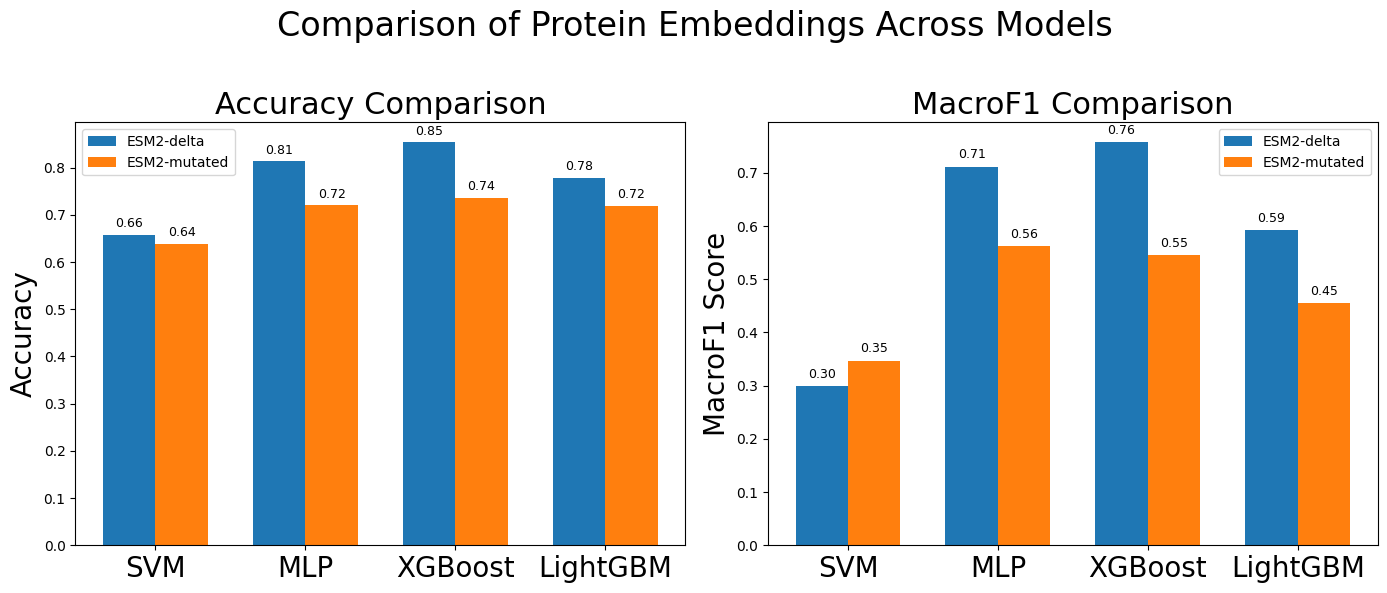

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('default')

# Model and performance data
models = ["SVM", "MLP", "XGBoost", "LightGBM"]
accuracy_delta = [0.6576, 0.8133, 0.8533, 0.7789]
accuracy_mutated = [0.6388, 0.7203, 0.7353, 0.7185]
macrof1_delta = [0.2985, 0.7116, 0.7571, 0.5923]
macrof1_mutated = [0.3469, 0.5623, 0.5458, 0.4546]

# Set up the bar chart
bar_width = 0.35
x = range(len(models))

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Accuracy 
bars1 = axs[0].bar(x, accuracy_delta, width=bar_width, label="ESM2-delta")
bars2 = axs[0].bar([i + bar_width for i in x], accuracy_mutated, width=bar_width, label="ESM2-mutated")
axs[0].set_title("Accuracy Comparison", fontsize=22)
axs[0].set_xticks([i + bar_width / 2 for i in x])
axs[0].set_xticklabels(models, fontsize=20)
axs[0].set_ylabel("Accuracy", fontsize=20)
axs[0].legend()
for bar in bars1 + bars2:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=9)

# MacroF1 
bars3 = axs[1].bar(x, macrof1_delta, width=bar_width, label="ESM2-delta")
bars4 = axs[1].bar([i + bar_width for i in x], macrof1_mutated, width=bar_width, label="ESM2-mutated")
axs[1].set_title("MacroF1 Comparison", fontsize=22)
axs[1].set_xticks([i + bar_width / 2 for i in x])
axs[1].set_xticklabels(models, fontsize=20)
axs[1].set_ylabel("MacroF1 Score", fontsize=20)
axs[1].legend()
for bar in bars3 + bars4:
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=9)

plt.suptitle("Comparison of Protein Embeddings Across Models", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

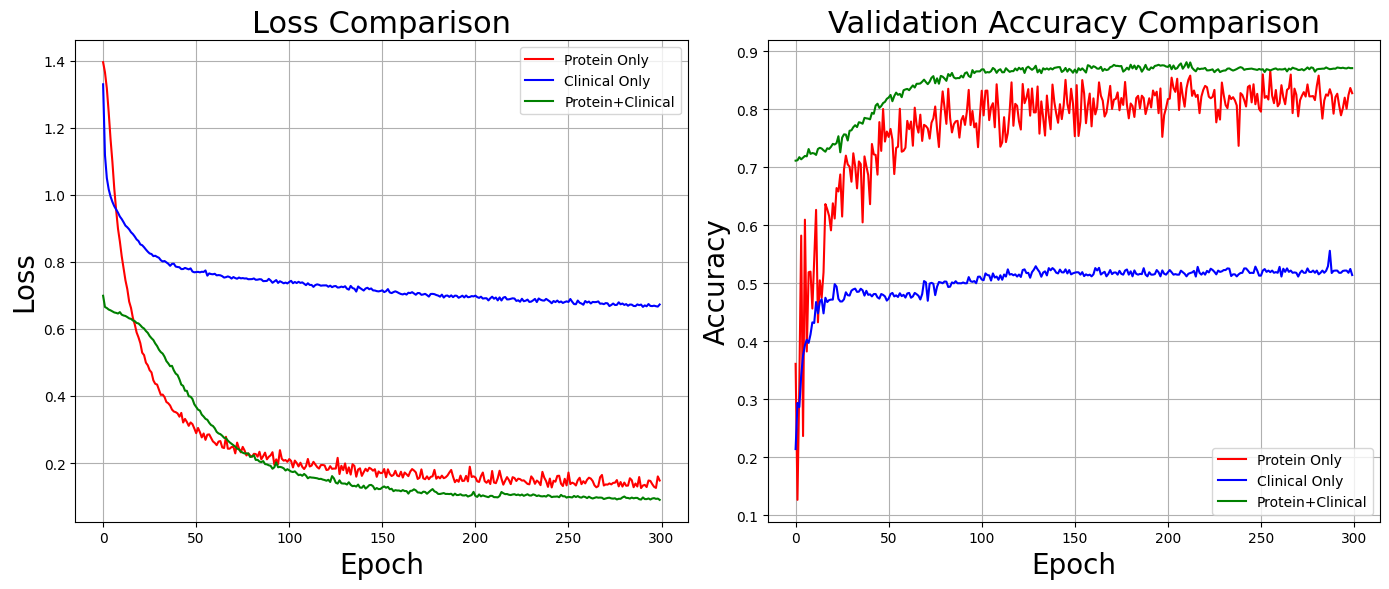

In [ ]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


def extract_loss_acc(log_text):
    """
    Extract the loss and accuracy of each epoch in the log.
    The input is a block composed of strings similar to "Epoch 1 | Loss: 1.3958 | Val Acc: 0.3611".
    Return two lists: loss_list and acc_list.
    """
    pattern = r"Epoch\s+\d+\s+\|\s+Loss:\s+([\d.]+)\s+\|\s+Val Acc:\s+([\d.]+)"
    matches = re.findall(pattern, log_text)
    loss = [float(l) for l, _ in matches]
    acc = [float(a) for _, a in matches]
    return loss, acc

with open("./data/Log.txt", "r", encoding="utf-8") as f:
    full_log = f.read()

# Using regex to extract the relevant sections
protein_text = re.search(r"Protein ONLY(.*?)Clinical ONLY", full_log, re.DOTALL).group(1)
clinical_text = re.search(r"Clinical ONLY(.*?)Protein\+Clinical", full_log, re.DOTALL).group(1)
fusion_text = re.search(r"Protein\+Clinical(.*)", full_log, re.DOTALL).group(1)

# Extract loss and accuracy data
protein_loss, protein_acc = extract_loss_acc(protein_text)
clinical_loss, clinical_acc = extract_loss_acc(clinical_text)
fusion_loss, fusion_acc = extract_loss_acc(fusion_text)

# Plotting the results
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(protein_loss, label='Protein Only', color='red')
plt.plot(clinical_loss, label='Clinical Only', color='blue')
plt.plot(fusion_loss, label='Protein+Clinical', color='green')
plt.title('Loss Comparison', fontsize=22)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(protein_acc, label='Protein Only', color='red')
plt.plot(clinical_acc, label='Clinical Only', color='blue')
plt.plot(fusion_acc, label='Protein+Clinical', color='green')
plt.title('Validation Accuracy Comparison', fontsize=22)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

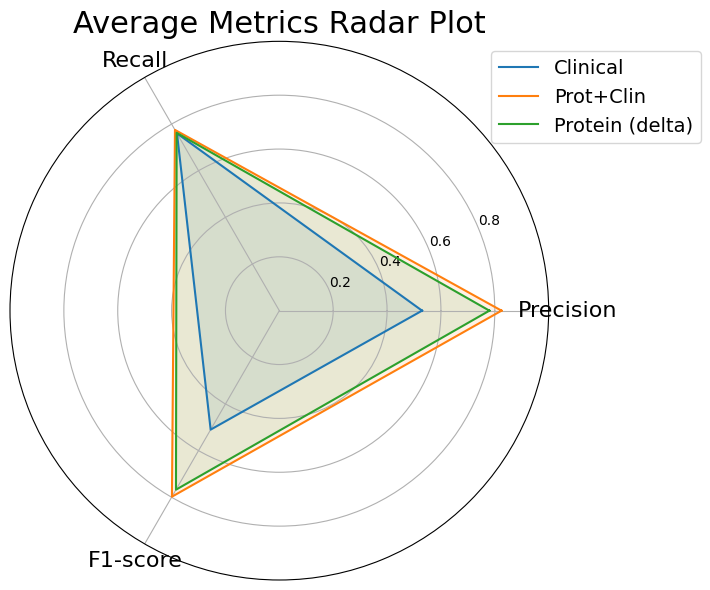

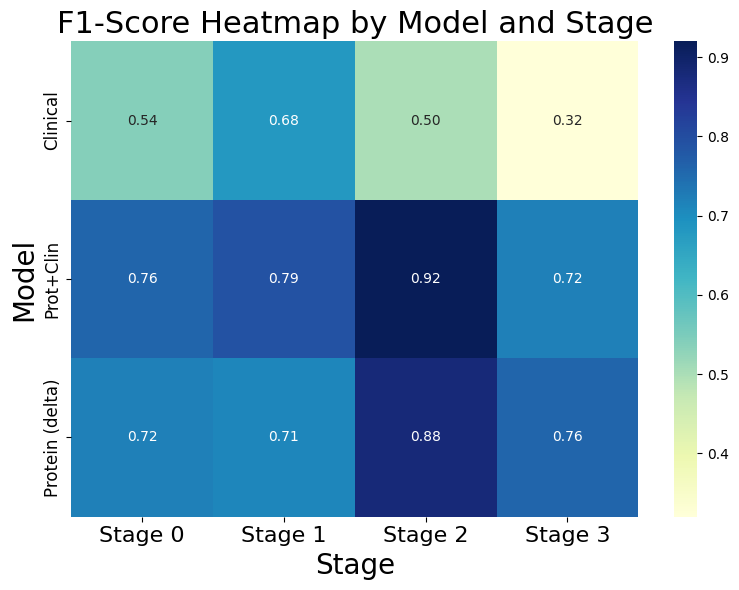

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")


# Building the report data
report_data = {
    "Protein (delta)": {
        "Stage 0": [0.72, 0.71, 0.72],
        "Stage 1": [0.64, 0.79, 0.71],
        "Stage 2": [0.91, 0.86, 0.88],
        "Stage 3": [0.85, 0.69, 0.76],
    },
    "Clinical": {
        "Stage 0": [0.37, 0.95, 0.54],
        "Stage 1": [0.58, 0.82, 0.68],
        "Stage 2": [0.98, 0.34, 0.50],
        "Stage 3": [0.19, 0.93, 0.32],
    },
    "Prot+Clin": {
        "Stage 0": [0.82, 0.70, 0.76],
        "Stage 1": [0.82, 0.77, 0.79],
        "Stage 2": [0.90, 0.94, 0.92],
        "Stage 3": [0.76, 0.69, 0.72],
    },
}

# DataFrame
df_combined = pd.concat({
    model: pd.DataFrame.from_dict(metrics, orient="index", columns=["Precision", "Recall", "F1-score"])
    for model, metrics in report_data.items()
}, names=["Model", "Stage"]).reset_index()

# ====== Plot 1: Bar plot for Precision / Recall / F1 per stage ======
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_combined.melt(id_vars=["Model", "Stage"], var_name="Metric", value_name="Score"),
#             x="Stage", y="Score", hue="Model", palette="Set2", ci=None)
# plt.title("Metric Comparison by Model and Stage", fontsize=22)
# plt.ylabel("Score", fontsize=20)
# plt.xlabel("Stage", fontsize=20)
# plt.grid(axis="y")
# plt.legend(title="Model", fontsize=16)
# plt.tight_layout()
# plt.show()

# ====== Plot 2: Radar chart of macro avg F1-score ======
from math import pi

# Calculate average metrics for each model
avg_df = df_combined.groupby("Model")[["Precision", "Recall", "F1-score"]].mean()

# Radar chart
labels = avg_df.columns.tolist()
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # complete the loop

plt.figure(figsize=(8, 6))
for model in avg_df.index:
    values = avg_df.loc[model].tolist()
    values += values[:1]
    plt.polar(angles, values, label=model)
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], labels, fontsize=16)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"])
plt.ylim(0, 1)
plt.title("Average Metrics Radar Plot", fontsize=22)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1), fontsize=14)
plt.tight_layout()
plt.show()

# ====== Plot 3: Heatmap ======
heat_data = df_combined.pivot(index="Model", columns="Stage", values="F1-score")
plt.figure(figsize=(8, 6))
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("F1-Score Heatmap by Model and Stage", fontsize=22)
plt.xlabel("Stage", fontsize=20)
plt.ylabel("Model", fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()

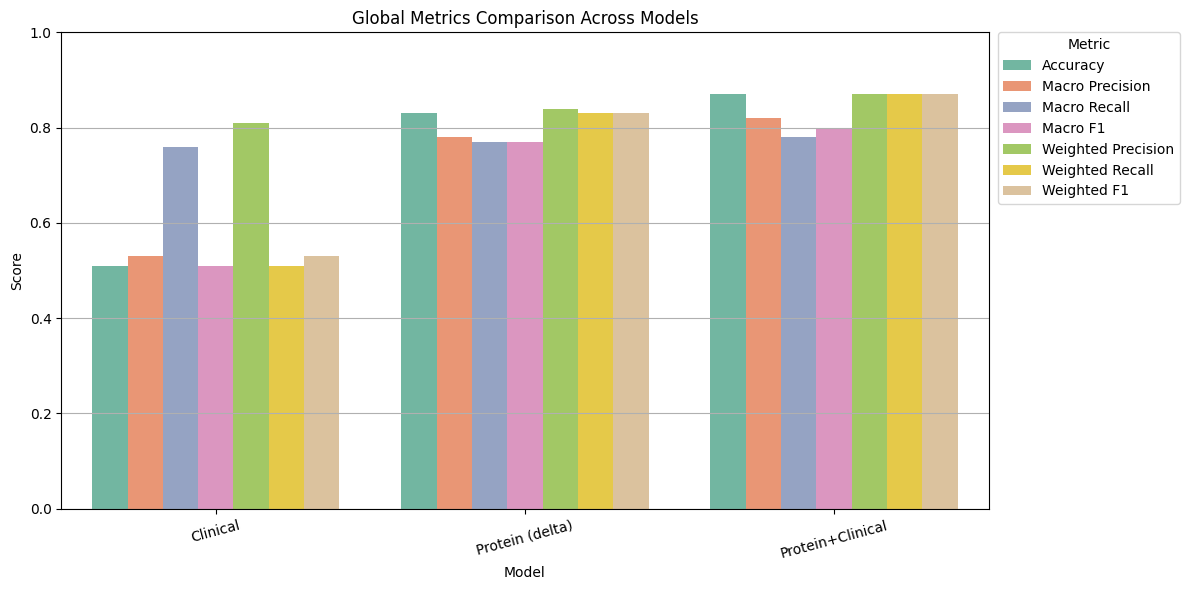

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame
data = {
    "Model": ["Clinical", "Protein (delta)", "Protein+Clinical"],
    "Accuracy": [0.51, 0.83, 0.87],
    "Macro Precision": [0.53, 0.78, 0.82],
    "Macro Recall": [0.76, 0.77, 0.78],
    "Macro F1": [0.51, 0.77, 0.80],
    "Weighted Precision": [0.81, 0.84, 0.87],
    "Weighted Recall": [0.51, 0.83, 0.87],
    "Weighted F1": [0.53, 0.83, 0.87],
}
df = pd.DataFrame(data)

df_melt = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plotting
plt.figure(figsize=(12, 6))
import seaborn as sns
sns.barplot(data=df_melt, x="Model", y="Score", hue="Metric", palette="Set2")
plt.title("Global Metrics Comparison Across Models")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.grid(axis="y")
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title="Metric")
plt.tight_layout()
plt.show()

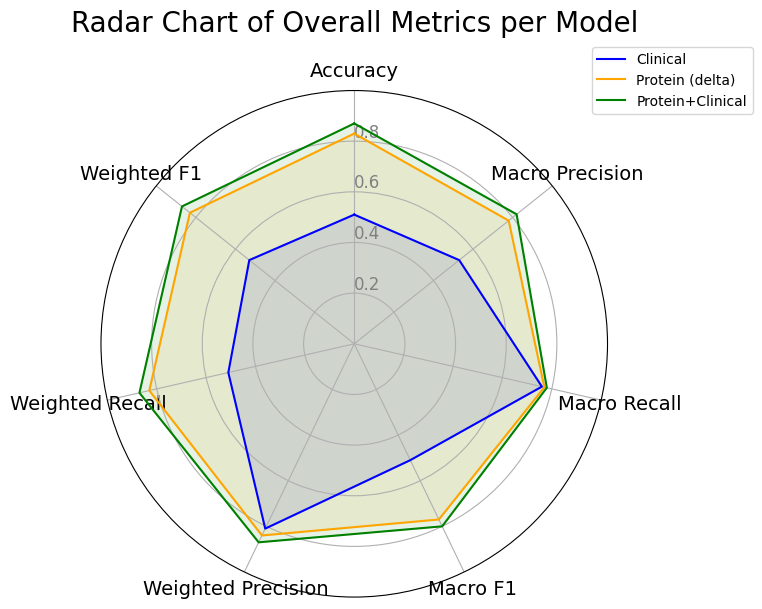

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')    

# Metric labels
labels = ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1',
          'Weighted Precision', 'Weighted Recall', 'Weighted F1']
num_vars = len(labels)

# Data for each model
clinical = [0.51, 0.53, 0.76, 0.51, 0.81, 0.51, 0.53]
protein = [0.83, 0.78, 0.77, 0.77, 0.84, 0.83, 0.83]
fusion = [0.87, 0.82, 0.78, 0.80, 0.87, 0.87, 0.87]

# angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

clinical += clinical[:1]
protein += protein[:1]
fusion += fusion[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], labels, fontsize=14)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=12)
plt.ylim(0, 1)

# Plot each model
ax.plot(angles, clinical, label='Clinical', color='blue')
ax.fill(angles, clinical, alpha=0.1, color='blue')

ax.plot(angles, protein, label='Protein (delta)', color='orange')
ax.fill(angles, protein, alpha=0.1, color='orange')

ax.plot(angles, fusion, label='Protein+Clinical', color='green')
ax.fill(angles, fusion, alpha=0.1, color='green')

# Add a title and legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title("Radar Chart of Overall Metrics per Model", size=20, y=1.1)
plt.tight_layout()
plt.show()